In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets/hydrogen.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5000 non-null   int64 
 1   text    5000 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [3]:
df

,label,text
0,0,theres hydrogen and helium then lithium beryll...
1,0,theres hydrogen and helium then lithium beryll...
2,0,got called the square in a brony aerospace mee...
3,0,in a hydrogen war ravaged society the nubile y...
4,0,i am made of flesh lotsa carbon and hydrogen a...
...,...,...
4995,0,shell nederland is andrew forrest not a good c...
4996,1,symbiofcell will invest billion in france lear...
4997,1,our industry model is completely backwards ups...
4998,1,meetings with regional and international leade...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

tw_df = df['text']

tweets = vectorizer.fit_transform(tw_df)
tweets_features = vectorizer.get_feature_names_out(tw_df)

tweets_df = pd.DataFrame(tweets.toarray(), columns = tweets_features)
tweets_df

,aaa,aaaaaand,aabb,aam,aapne,aaron,aayog,aayushjs,ab,abate,...,zones,zoo,zoot,zqke,zsw,ztqu,zurich,zuurstof,zwo,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
tfidf = pd.read_csv("datasets/tfidf_features.csv")
tfidf

,aaa,aaaaaand,aabb,aam,aapne,aaron,aayog,aayushjs,ab,abate,...,zoo,zoot,zqke,zsw,ztqu,zurich,zuurstof,zwo,zz,tweet_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,655696229586833408
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,648932547251040257
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595438648138530816
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.303982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,583130424471326720
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,656142309352939520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1509170817300676621
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1580906325403312129
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,978094796588961793
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1519373194938884096


In [8]:
tfidf.drop(['tweet_id'], axis = 1, inplace = True)

In [13]:
X = pd.DataFrame(tfidf, index = tfidf.index, columns = tfidf.columns)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tfidf)

In [17]:
y = df["label"].values

X = pd.DataFrame(X_scaled, index = tfidf.index, columns = tfidf.columns)
X

,aaa,aaaaaand,aabb,aam,aapne,aaron,aayog,aayushjs,ab,abate,...,zones,zoo,zoot,zqke,zsw,ztqu,zurich,zuurstof,zwo,zz
0,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
1,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
2,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
3,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,70.703607,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
4,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
4996,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
4997,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
4998,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144


# Principal Component Analysis (PCA)

In [10]:
pca = PCA (n_components = 2)
X_pca = pca.fit_transform(X.values)

In [11]:
X_pca = pd.DataFrame(X_pca, columns = ["PC1", "PC2"])
X_pca

,PC1,PC2
0,-0.061765,0.570393
1,-0.059226,0.602871
2,-0.102789,-0.074562
3,-0.001802,-0.213176
4,-0.053243,-0.095985
...,...,...
4995,0.050415,0.587278
4996,-0.076543,1.103270
4997,0.012534,-0.194639
4998,0.091257,-0.409251


In [12]:
print(pca.explained_variance_ratio_)
print("Total explained variance with 2 components:", sum(pca.explained_variance_ratio_))

[0.00135695 0.00127692]
Total explained variance with 2 components: 0.0026338708676213575


In [ ]:
comps_num = np.arange(1, 5001, 200)
comps_variance = []

for num in comps_num:
    pca = PCA(n_components = num)
    pca.fit(X)
    
    total_explained_variance = sum(pca.explained_variance_ratio_)
    comps_variance.append(total_explained_variance)

plt.figure(1, figsize=(12, 6))
plt.grid()

plt.plot(comps_num, comps_variance, marker='o')
plt.xlabel("# Components")
plt.ylabel("Total explained variance")
plt.show()

In [ ]:
pd.DataFrame(comps_variance, index = comps_num, columns = ["Total_explained_variance"])

In [19]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X.values)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

Total explained variance: 0.0026160827679920715


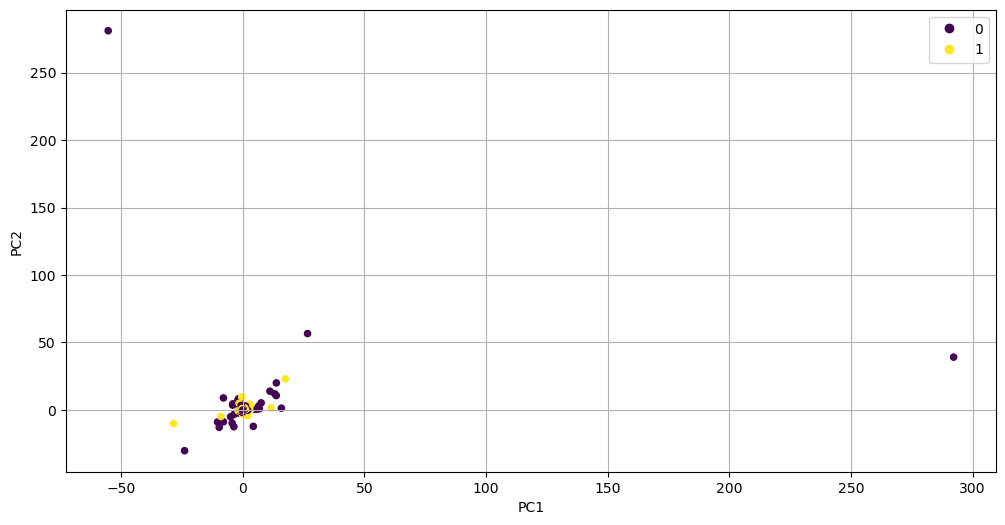

In [20]:
plt.figure(1, figsize = (12, 6))
plt.grid()

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, s=20)
plt.legend(*scatter.legend_elements())
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [21]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X.values)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

Total explained variance: 0.003863150837312377


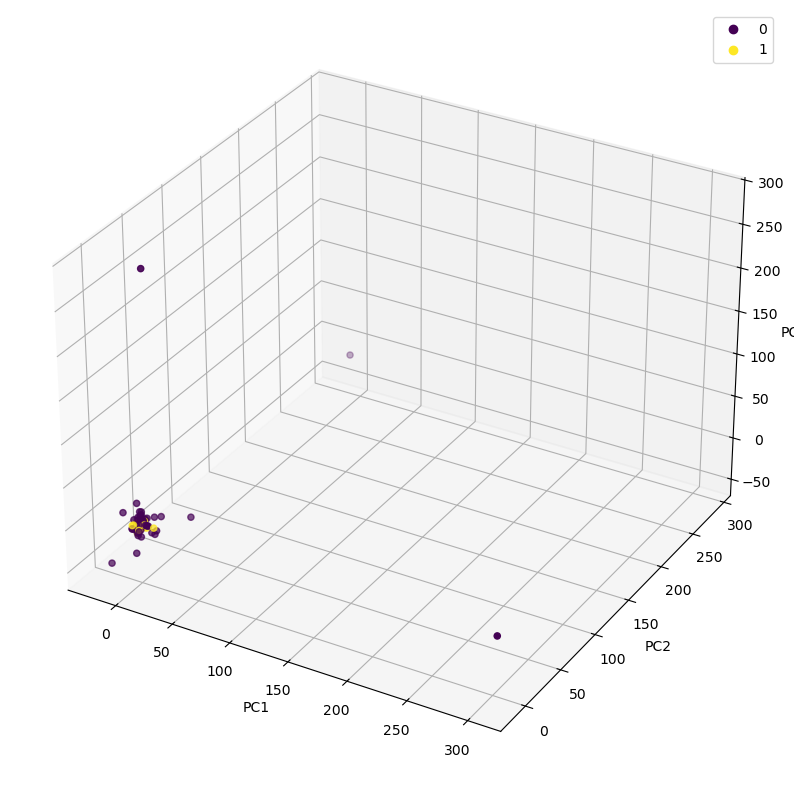

In [23]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, s=20)
plt.legend(*scatter.legend_elements())
ax.set(xlabel = "PC1", ylabel = "PC2", zlabel = "PC3")
plt.show()

In [ ]:
pca = PCA(n_components = 5)
X_pca_5 = pca.fit_transform(X.values)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

In [29]:
pca_best = PCA(n_components = 2601)
X_pca_best = pca_best.fit_transform(X.values)
print("Total explained variance:", sum(pca_best.explained_variance_ratio_))

Total explained variance: 0.8232045581285434


# t-SNE

In [30]:
from sklearn.manifold import TSNE

random_seed = 10

tsne = TSNE(n_components = 2, random_state = random_seed)
X_tsne = tsne.fit_transform(X_pca_best)

In [ ]:
print("KL divergence for 2 components:", tsne.kl_divergence_)

In [ ]:
tsne_comps_num = np.arange(1, 3+1)
tsne_comps_divergence = []

for num in tsne_comps_num:
    tsne = TSNE(n_components = num, random_state = random_seed)
    tsne.fit(X_pca_best)
    tsne_comps_divergence.append(tsne.kl_divergence_)
    print(f"KL Divergence for {num}: {tsne.kl_divergence_}")

In [ ]:
tsne_perplexity_num = np.arange(5, 50+1, 5)
tsne_perplexity_divergence = []

for perplexity in tsne_perplexity_num:
    tsne = TSNE(n_components = 2, perplexity=perplexity, random_state = random_seed)
    tsne.fit(X_pca_best)
    tsne_perplexity_divergence.append(tsne.kl_divergence_)
    print(f"KL Divergence for perplexity of {perplexity}: {tsne.kl_divergence_}")

In [ ]:
plt.figure(1, figsize=(12,6))
plt.grid()

plt.plot(tsne_perplexity_num, tsne_perplexity_divergence, marker='o')

plt.xlabel("Perplexity")
plt.ylabel("KL Divergence")
plt.show()

In [31]:
tsne = TSNE(n_components = 2, perplexity=50, random_state = random_seed)
X_tsne = tsne.fit_transform(X_pca_best)
print("KL divergence for 2 components:", tsne.kl_divergence_)

KL divergence for 2 components: 2.9505932331085205


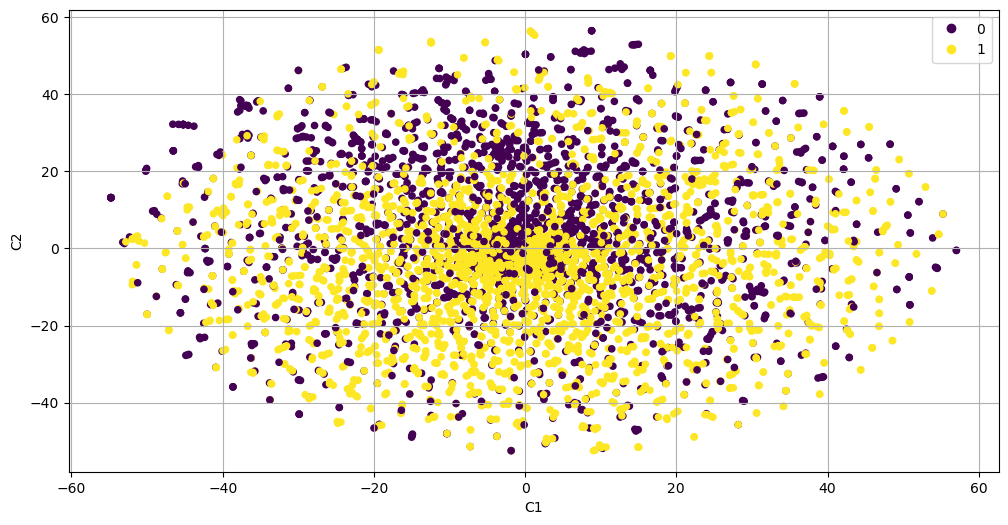

In [32]:
plt.figure(1, figsize = (12, 6))
plt.grid()

scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=20)
plt.legend(*scatter.legend_elements())
plt.xlabel("C1")
plt.ylabel("C2")
plt.show()

In [ ]:
tsne_perplexity_num = np.arange(5, 50+1, 5)
tsne_perplexity_divergence = []

for perplexity in tsne_perplexity_num:
    tsne = TSNE(n_components = 3, perplexity=perplexity, random_state = random_seed)
    tsne.fit(X_pca_best)
    tsne_perplexity_divergence.append(tsne.kl_divergence_)
    print(f"KL Divergence for perplexity of {perplexity}: {tsne.kl_divergence_}")

In [33]:
tsne = TSNE(n_components = 3, perplexity=40, random_state = random_seed)
X_tsne = tsne.fit_transform(X_pca_best)
print("KL divergence for 3 components:", tsne.kl_divergence_)

KL divergence for 3 components: 3.247915506362915


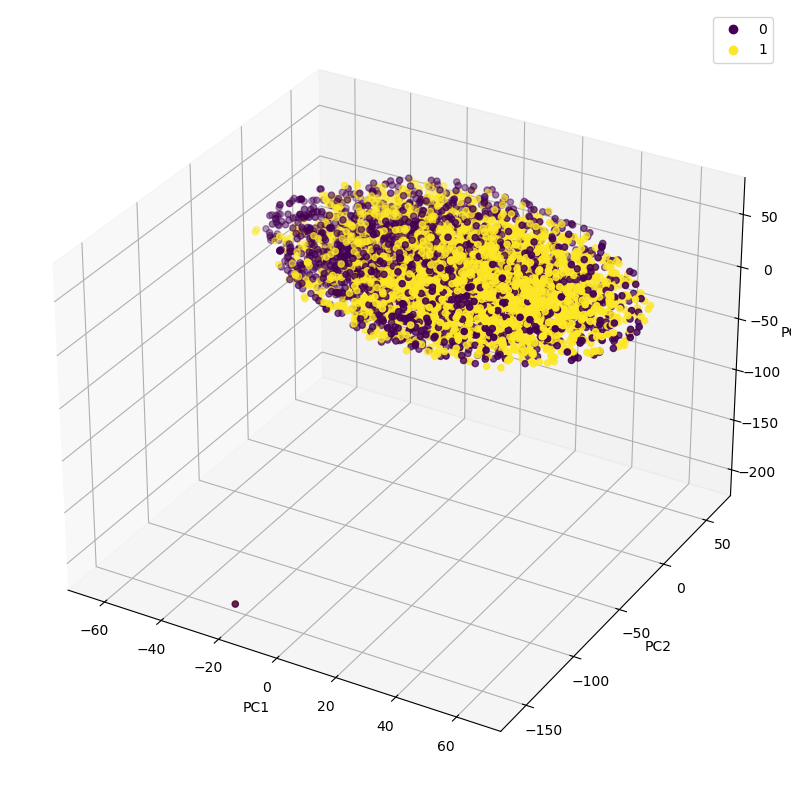

In [34]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, s=20)
plt.legend(*scatter.legend_elements())
ax.set(xlabel = "PC1", ylabel = "PC2", zlabel = "PC3")
plt.show()

In [ ]:
tsne = TSNE(n_components = 1, perplexity=50, random_state = random_seed)
X_tsne = tsne.fit_transform(X_pca_best)
print("KL divergence for 1 components:", tsne.kl_divergence_)

In [ ]:
tsne_perplexity_num = np.arange(5, 50+1, 5)
tsne_perplexity_divergence = []

for perplexity in tsne_perplexity_num:
    tsne = TSNE(n_components = 1, perplexity=perplexity, random_state = random_seed)
    tsne.fit(X_pca_best)
    tsne_perplexity_divergence.append(tsne.kl_divergence_)
    print(f"KL Divergence for perplexity of {perplexity}: {tsne.kl_divergence_}")

In [ ]:
plt.figure(1, figsize=(12,6))
plt.grid()

plt.plot(tsne_perplexity_num, tsne_perplexity_divergence, marker='o')

plt.xlabel("Perplexity")
plt.ylabel("KL Divergence")
plt.show()

## Curse of Dimensionality

In [35]:
X

,aaa,aaaaaand,aabb,aam,aapne,aaron,aayog,aayushjs,ab,abate,...,zones,zoo,zoot,zqke,zsw,ztqu,zurich,zuurstof,zwo,zz
0,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
1,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
2,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
3,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,70.703607,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
4,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
4996,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
4997,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144
4998,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.01996,-0.014144,-0.014144,-0.023789,-0.019781,...,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144,-0.014144


In [36]:
sample_1 = X.iloc[1]
sample_1

aaa        -0.014144
aaaaaand   -0.014144
aabb       -0.014144
aam        -0.014144
aapne      -0.014144
              ...   
ztqu       -0.014144
zurich     -0.014144
zuurstof   -0.014144
zwo        -0.014144
zz         -0.014144
Name: 1, Length: 13813, dtype: float64

In [37]:
sample_2 = X.iloc[3]
sample_2

aaa        -0.014144
aaaaaand   -0.014144
aabb       -0.014144
aam        -0.014144
aapne      -0.014144
              ...   
ztqu       -0.014144
zurich     -0.014144
zuurstof   -0.014144
zwo        -0.014144
zz         -0.014144
Name: 3, Length: 13813, dtype: float64

In [38]:
samples = pd.concat([sample_1, sample_2], axis = 1)

In [42]:
samples.shape

(13813, 2)

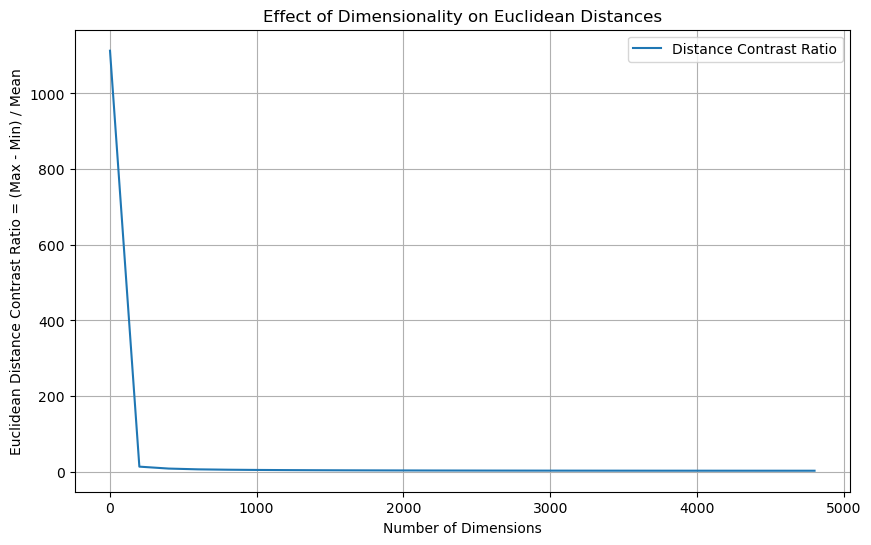

In [37]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt

# Assume X is defined elsewhere
# For example:
# X = pd.DataFrame(np.random.rand(100, 10000))

dims = np.arange(1, 5000+1, 200)

avg_distances = []
min_distances = []
max_distances = []

for d in dims:
    pca = PCA(n_components=d)
    reduced = pca.fit_transform(X.values)
    dists = euclidean_distances(reduced)
    
    # Remove self-distances (diagonal)
    dists_no_diag = dists[~np.eye(dists.shape[0], dtype=bool)].reshape(dists.shape[0], -1)
    
    avg_distances.append(np.mean(dists_no_diag))
    min_distances.append(np.min(dists_no_diag))
    max_distances.append(np.max(dists_no_diag))

# Convert to NumPy arrays for element-wise operations
avg_distances = np.array(avg_distances)
min_distances = np.array(min_distances)
max_distances = np.array(max_distances)

Ratio_dis = (max_distances - min_distances) / avg_distances

plt.figure(figsize=(10, 6))
plt.plot(dims, Ratio_dis, label='Distance Contrast Ratio')
plt.xlabel('Number of Dimensions')
plt.ylabel('Euclidean Distance Contrast Ratio = (Max - Min) / Mean')
plt.title('Effect of Dimensionality on Euclidean Distances')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Load TF-IDF data and select 5 samples
subset = tfidf[:5]

# Set dimensions to evaluate
max_dim = subset.shape[1]
dims = range(1, max_dim + 1, 10)

# Prepare storage
pairwise_distances = {f"{i}-{j}": [] for i in range(5) for j in range(i+1, 5)}
contrast_ratios = []
average_distances = []

# Loop over dimensions
for d in dims:
    truncated = subset[:, :d]
    dist_matrix = squareform(pdist(truncated, metric='euclidean'))
    
    dists = []
    for i in range(5):
        for j in range(i+1, 5):
            dist = dist_matrix[i, j]
            pairwise_distances[f"{i}-{j}"].append(dist)
            dists.append(dist)
    
    # Store average and contrast
    average_distances.append(np.mean(dists))
    contrast_ratios.append((np.max(dists) - np.min(dists)) / np.mean(dists))

# ----- Plot : Contrast ratio -----
plt.figure(figsize=(10, 4))
plt.plot(dims, contrast_ratios, color='red')
plt.title("Relative Distance Contrast Shrinks with Dimensionality")
plt.xlabel("Number of Dimensions")
plt.ylabel("Contrast Ratio = (Max - Min) / Mean")
plt.grid(True)
plt.tight_layout()
plt.show()